In [84]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
anthem = pd.read_csv('national_anthems.csv')
anthem = anthem.dropna(subset=['Anthem'])
anthem.head()

Country Alpha-2 Alpha-3 Continent  \
0     Albania      AL     ALB    Europe   
1     Armenia      AM     ARM    Europe   
2     Austria      AT     AUT    Europe   
3  Azerbaijan      AZ     AZE    Europe   
4     Belarus      BY     BLR    Europe   

                                              Anthem  
0  Around our flag we stand united, With one wish...  
1  Our Fatherland, free, independent, That has fo...  
2  Land of mountains, land by the river, Land of ...  
3  Azerbaijan, Azerbaijan! The glorious Fatherlan...  
4  We, Belarusians, are peaceful people, Wholehea...

In [144]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

anthem['Sentiment'] = anthem['Anthem'].apply(lambda x: TextBlob(x).sentiment.polarity)
anthem['Sentiment']

0      0.371591
1      0.160000
2      0.379502
3      0.445275
4      0.242052
         ...   
185    0.327543
186    0.354091
187    0.361905
188    0.518768
189    0.353333
Name: Sentiment, Length: 190, dtype: float64

In [164]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

sentences = ['We stand on guard for the.', 'Land of mountains, land by the river.', 'Oh lift high the banner, the flag of Zimbabwe.']

tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=, min_count=1, workers=4)


SyntaxError: invalid syntax (1678102411.py, line 8)

<Figure size 720x432 with 0 Axes>

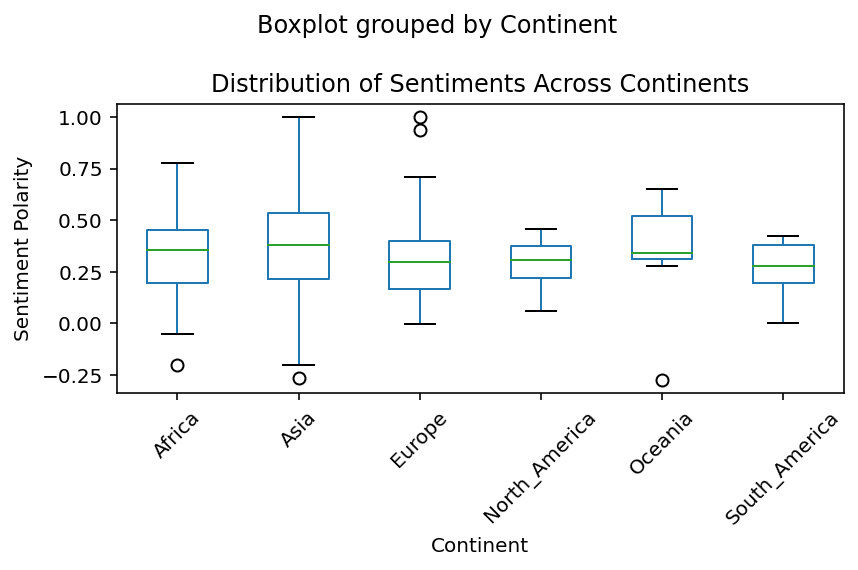

In [146]:
plt.figure(figsize=(10, 6))
anthem.boxplot(column='Sentiment', by='Continent', grid=False)
plt.title('Distribution of Sentiments Across Continents')
plt.xlabel('Continent')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

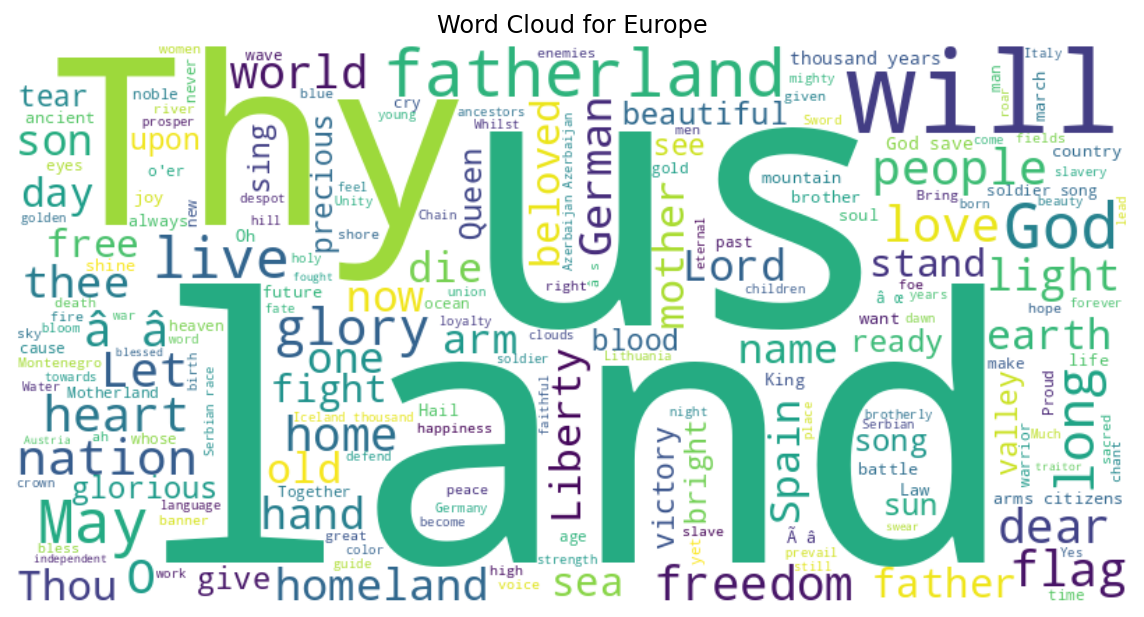

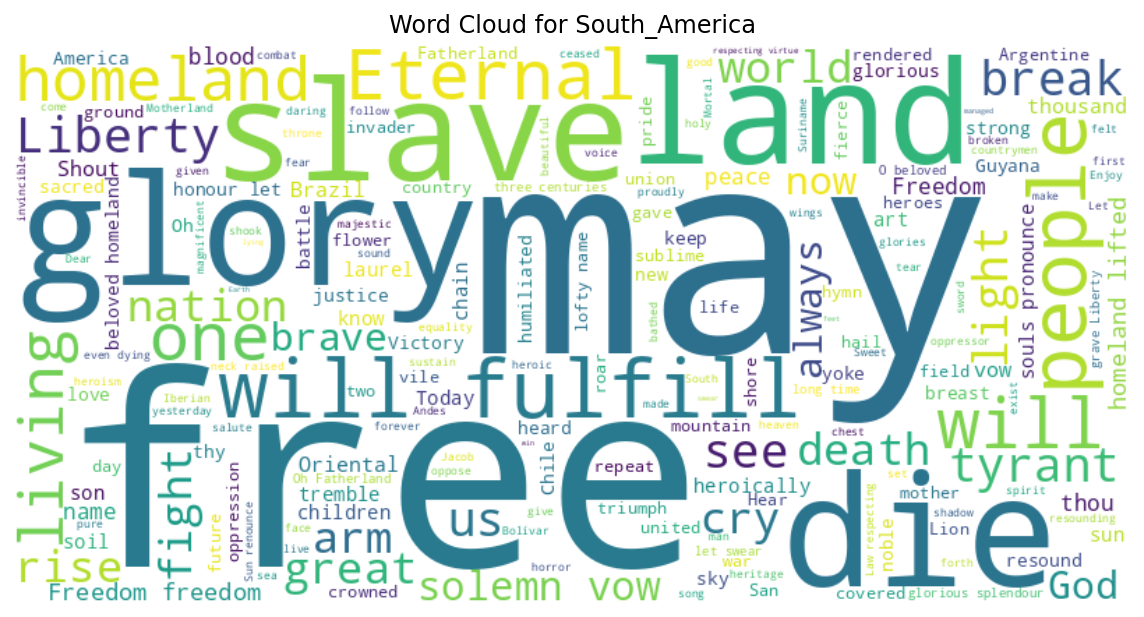

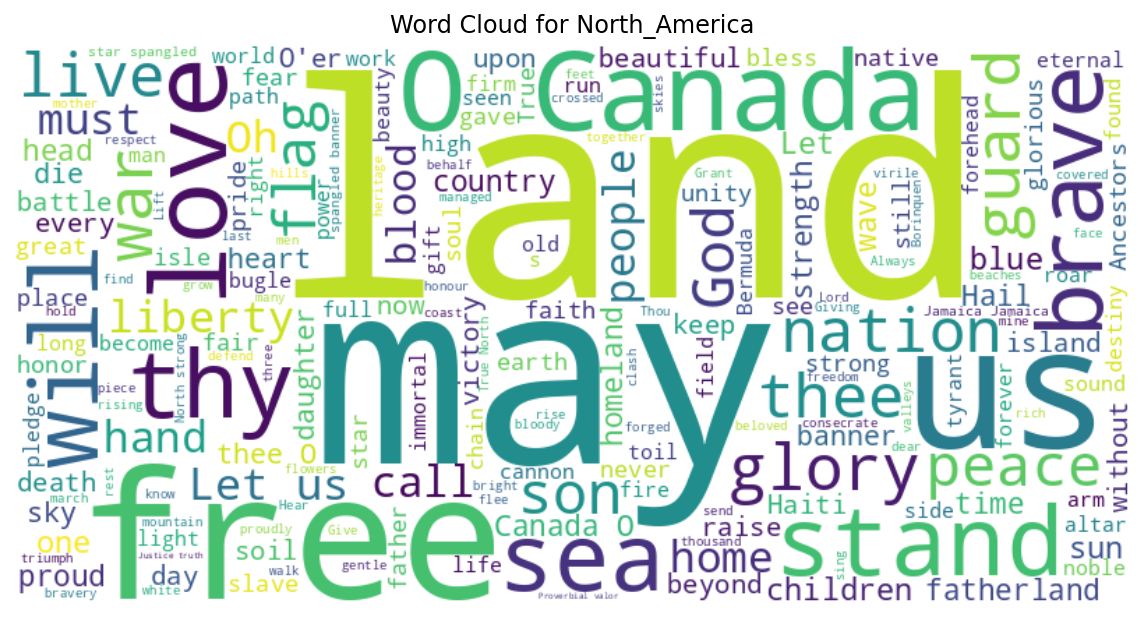

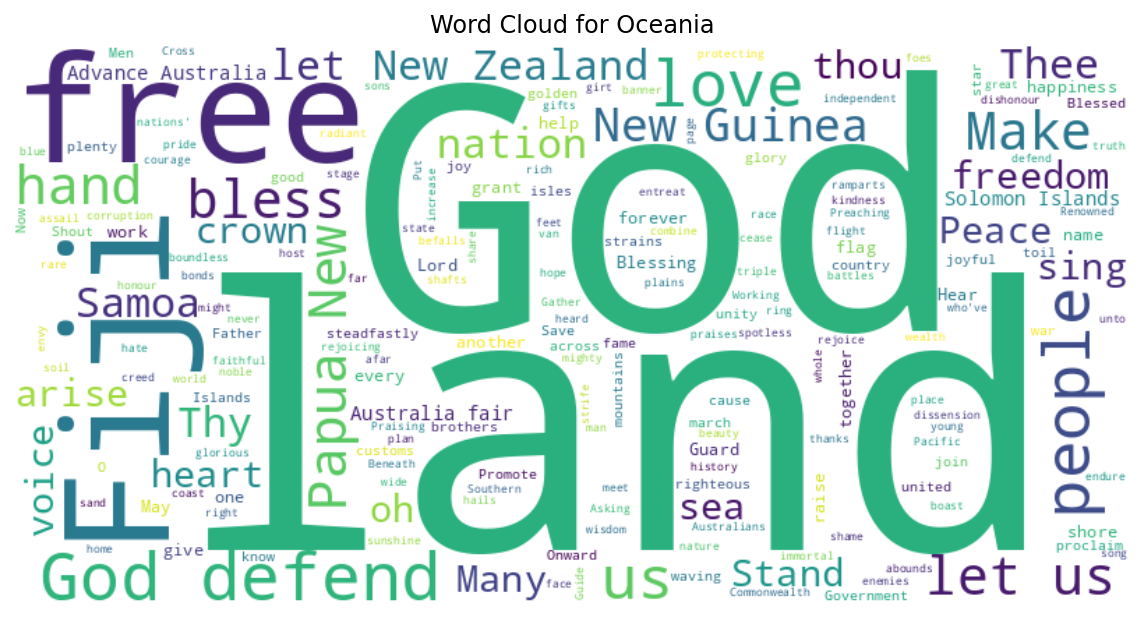

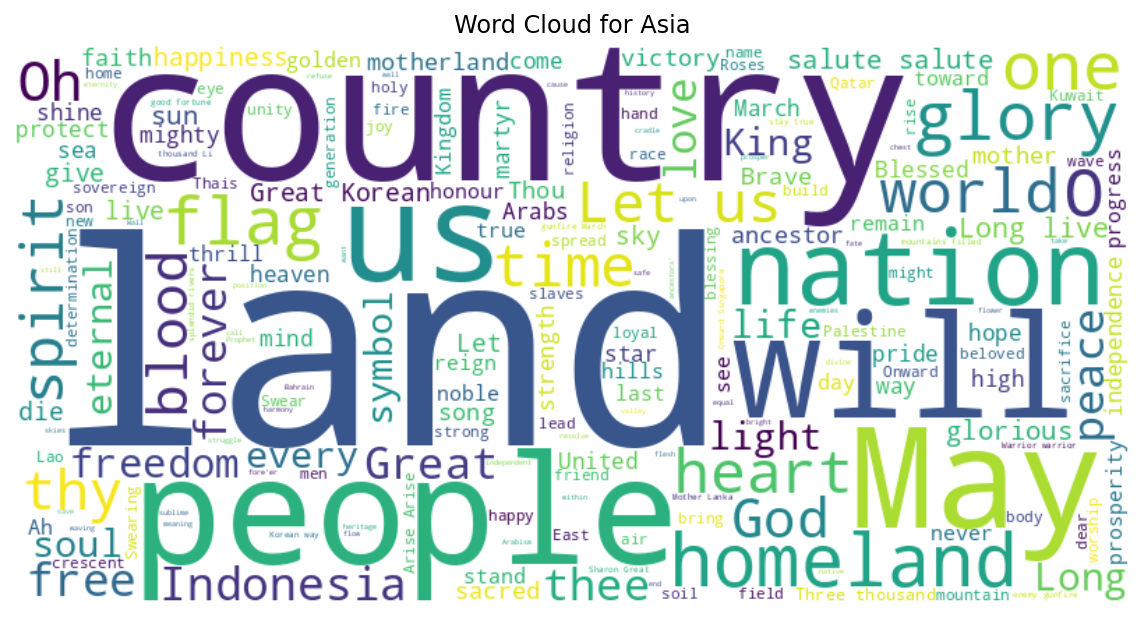

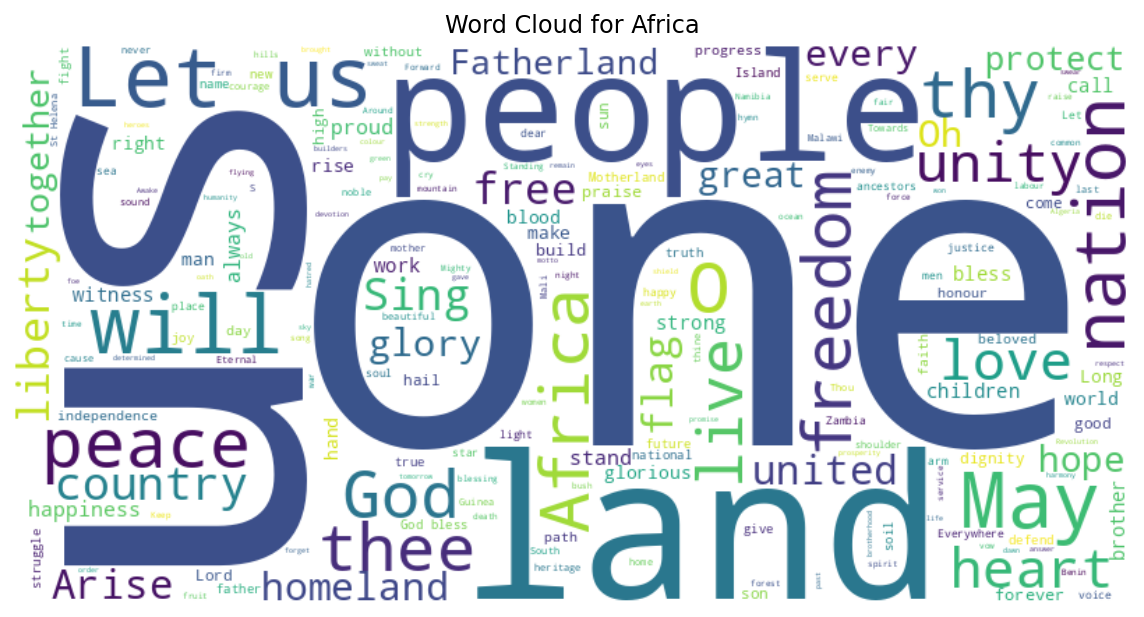

In [147]:
for continent in anthem['Continent'].unique():
    text = ' '.join(anthem[anthem['Continent'] == continent]['Anthem'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {continent}')
    plt.axis('off')
    plt.show()

In [148]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [149]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)
anthem['Cleaned_Anthem'] = anthem['Anthem'].apply(preprocess_text)

print(anthem['Cleaned_Anthem'])

0      around flag stand united one wish one goal sac...
1      fatherland free independent century lived summ...
2      land mountain land river land field land cathe...
3      azerbaijan azerbaijan glorious fatherland valo...
4      belarusian peaceful people wholeheartedly devo...
                             ...                        
185    defender homeland rally around glory time bloo...
186    oh uganda may god uphold thee lay future thy h...
187    son sahara battlefield torch holder long road ...
188    stand sing zambia proud free land work joy uni...
189    oh lift high banner flag zimbabwe symbol freed...
Name: Cleaned_Anthem, Length: 190, dtype: object


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(anthem['Cleaned_Anthem'])

In [151]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity
anthem['Sentiment'] = anthem['Cleaned_Anthem'].apply(get_sentiment)

In [152]:
anthem['Sentiment']

0      0.393019
1      0.200000
2      0.368788
3      0.228716
4      0.247521
         ...   
185    0.374335
186    0.259091
187    0.361905
188    0.507440
189    0.353333
Name: Sentiment, Length: 190, dtype: float64

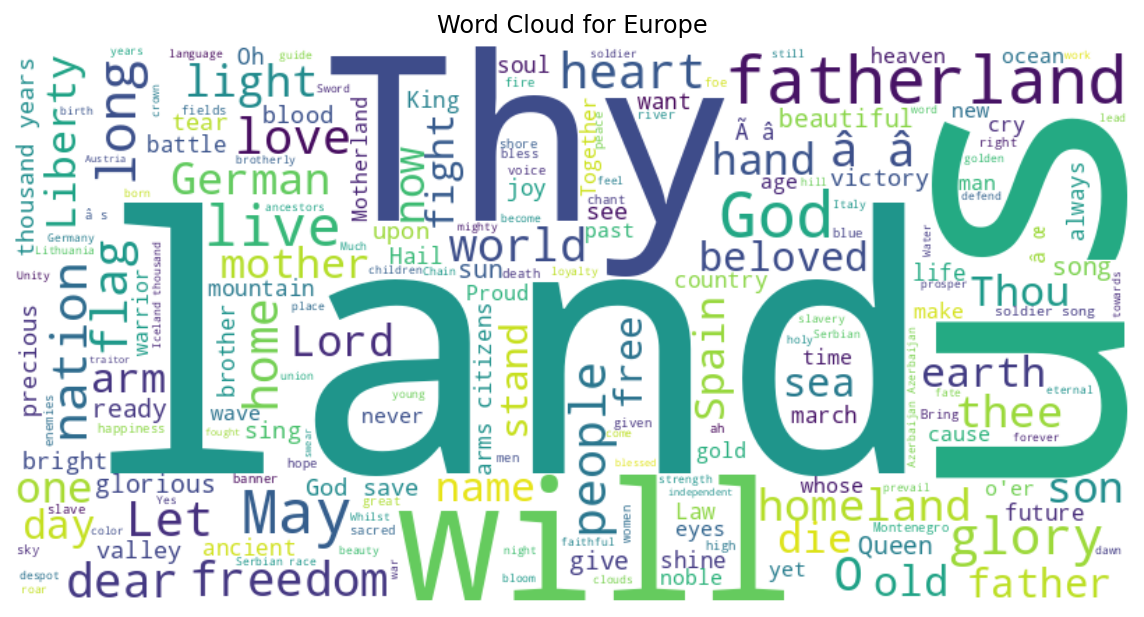

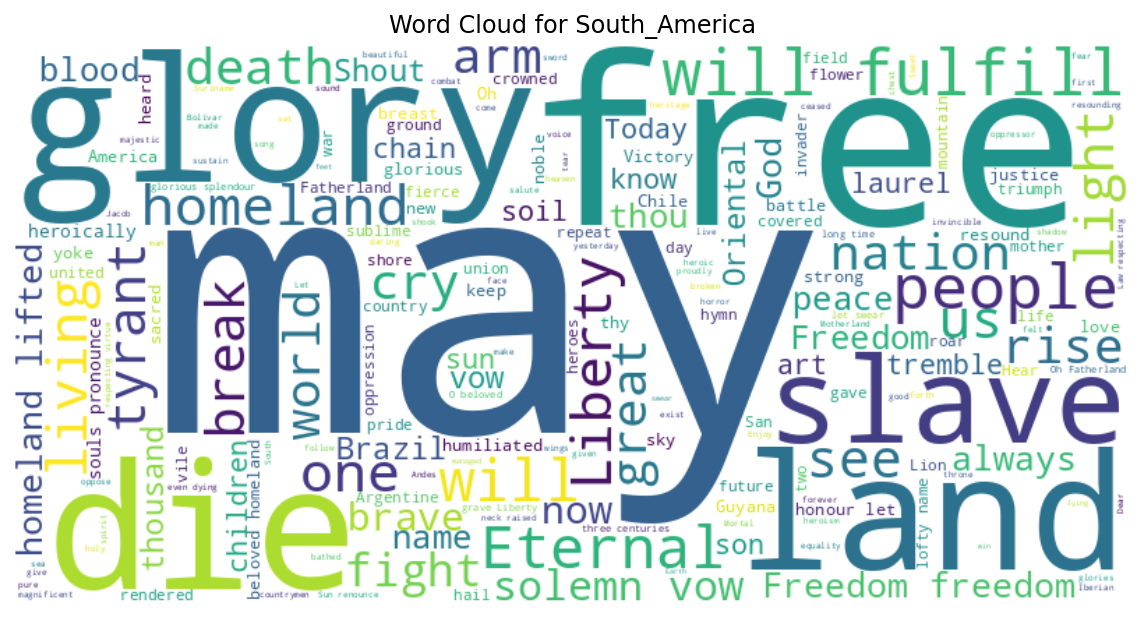

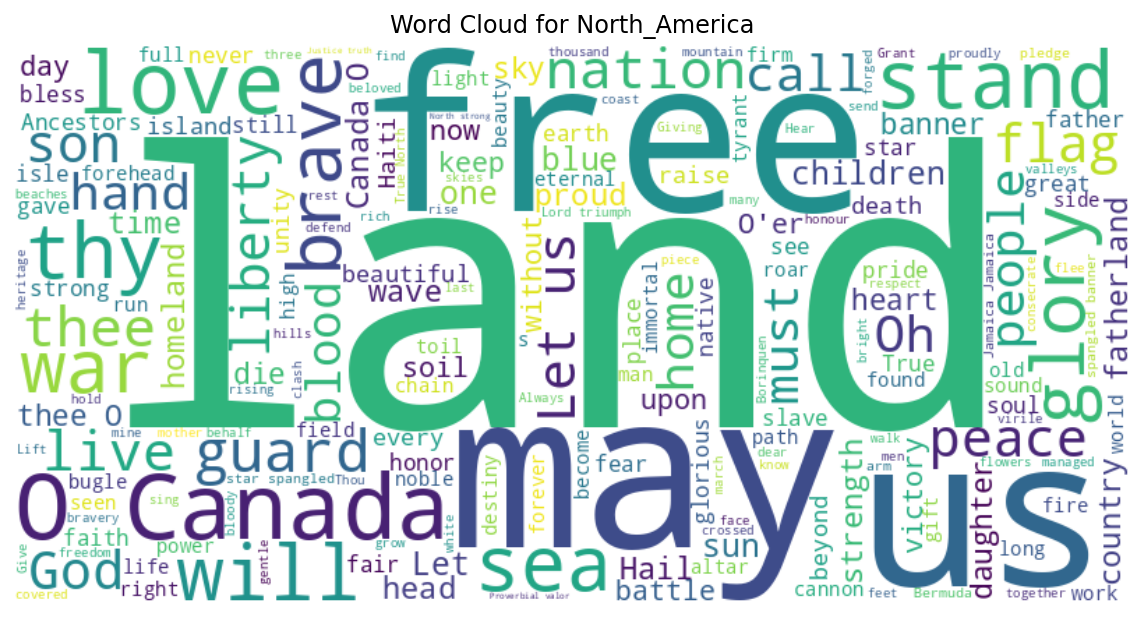

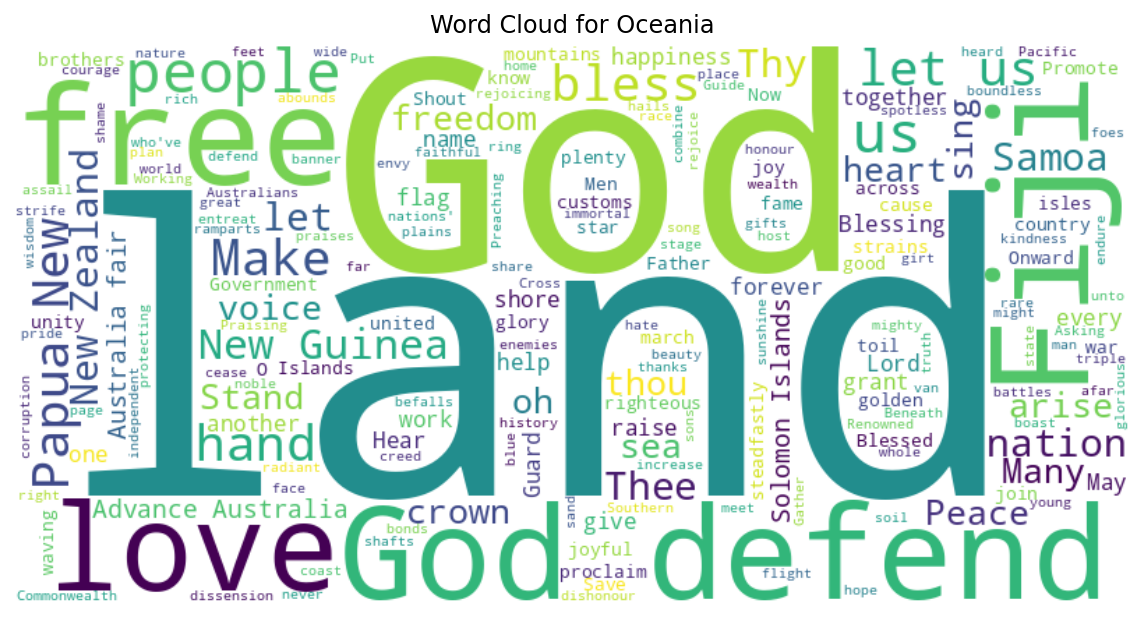

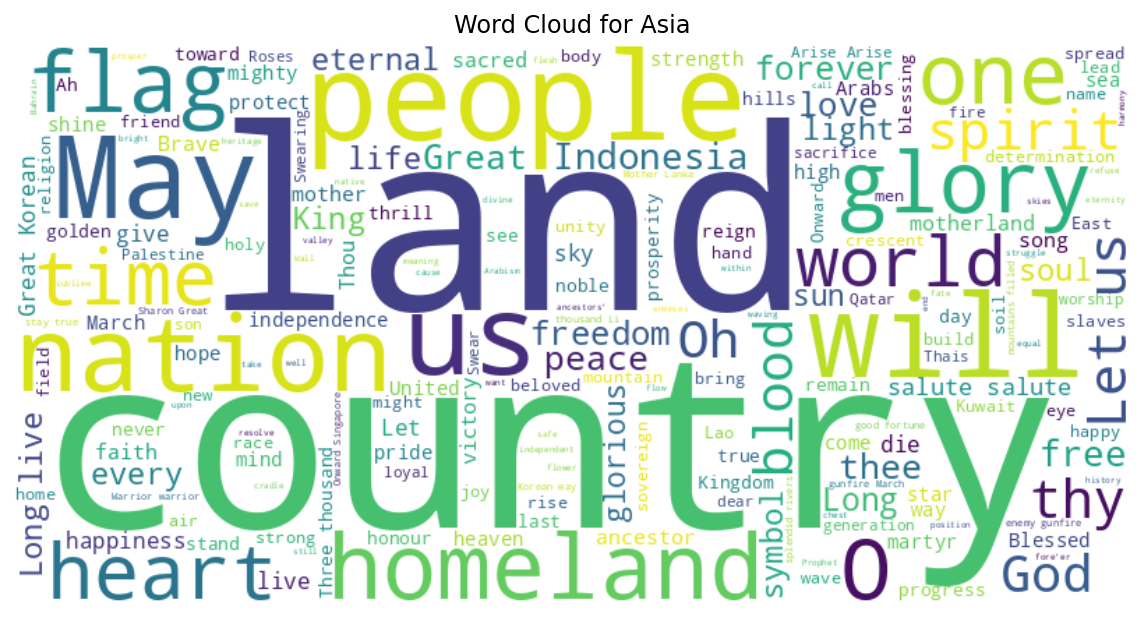

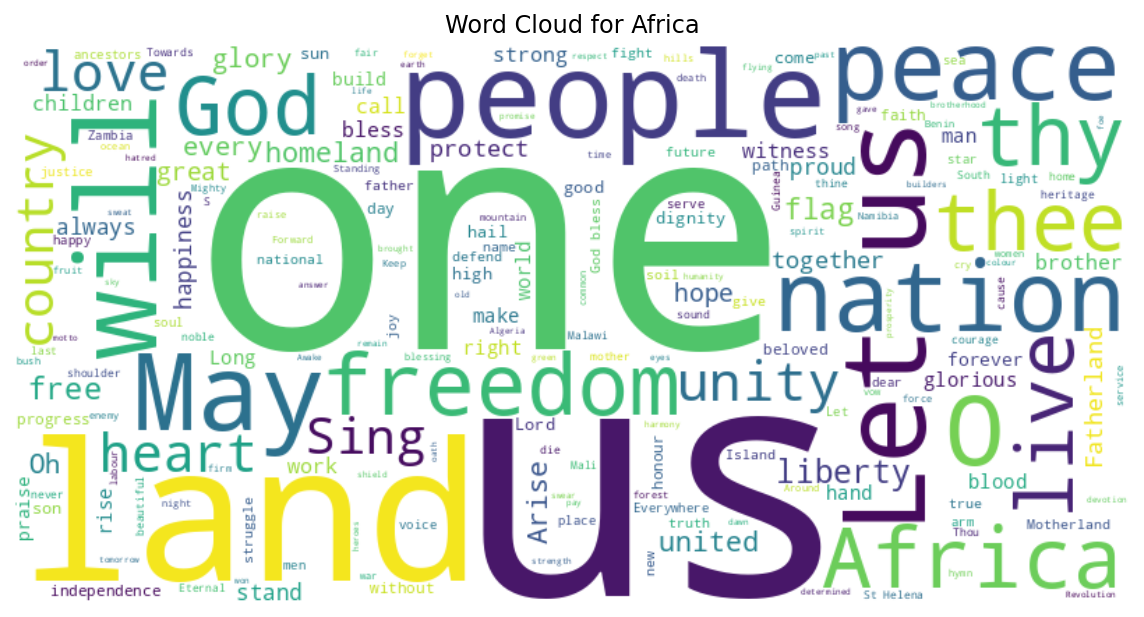

In [153]:
for continent in anthem['Continent'].unique():
    text = ' '.join(anthem[anthem['Continent'] == continent]['Anthem'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {continent}')
    plt.axis('off')
    plt.show()

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, anthem['Sentiment'], test_size=0.25, random_state=1)

In [155]:
X_train

<142x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5257 stored elements in Compressed Sparse Row format>

In [156]:
X_test

<48x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1807 stored elements in Compressed Sparse Row format>

In [157]:
from sklearn.cluster import DBSCAN

anthem_X = pd.get_dummies(anthem.drop(columns=['Continent']))
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(anthem_X)

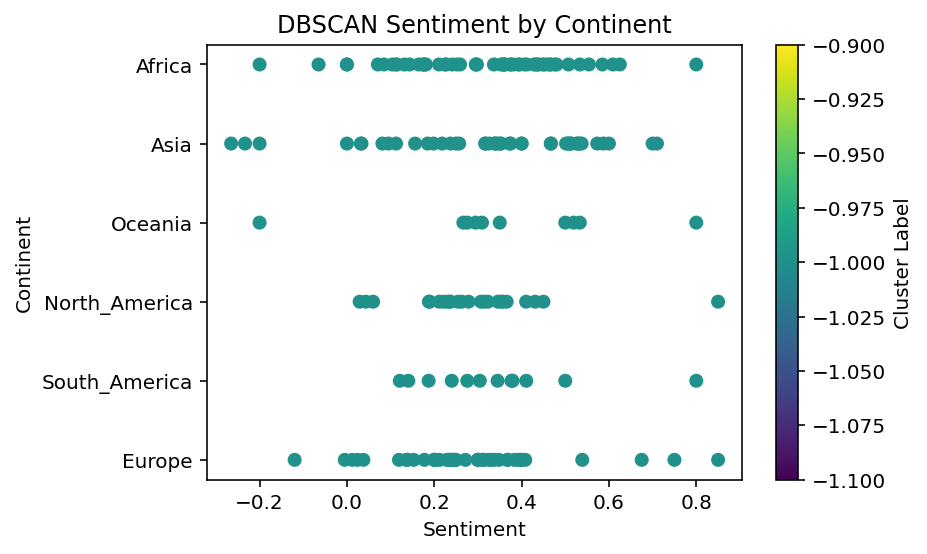

In [158]:
plt.scatter(anthem['Sentiment'], anthem['Continent'], c=clusters, cmap='viridis')
plt.xlabel('Sentiment')
plt.ylabel('Continent')
plt.title('DBSCAN Sentiment by Continent')
plt.colorbar(label='Cluster Label')
plt.show()

In [159]:
X_reset = anthem_X.reset_index()

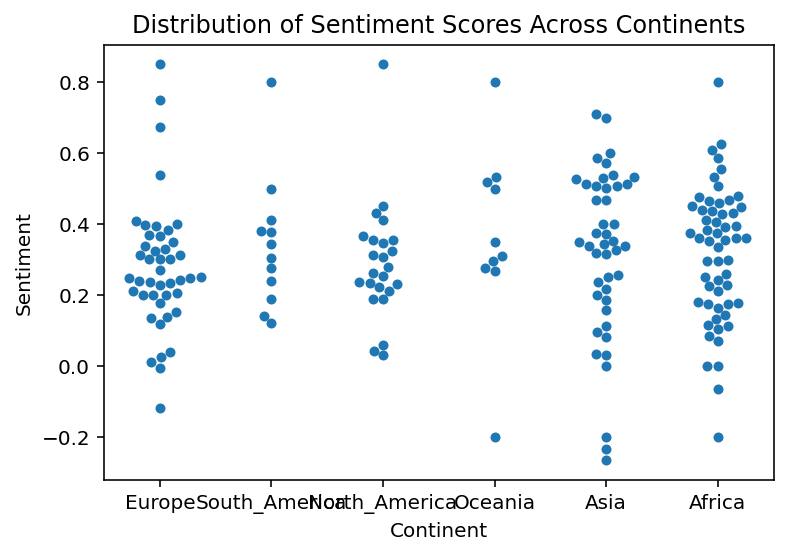

In [160]:
sns.swarmplot(data=anthem, x='Continent', y='Sentiment')
plt.xlabel('Continent')
plt.ylabel('Sentiment')
plt.title('Distribution of Sentiment Scores Across Continents')
plt.show()

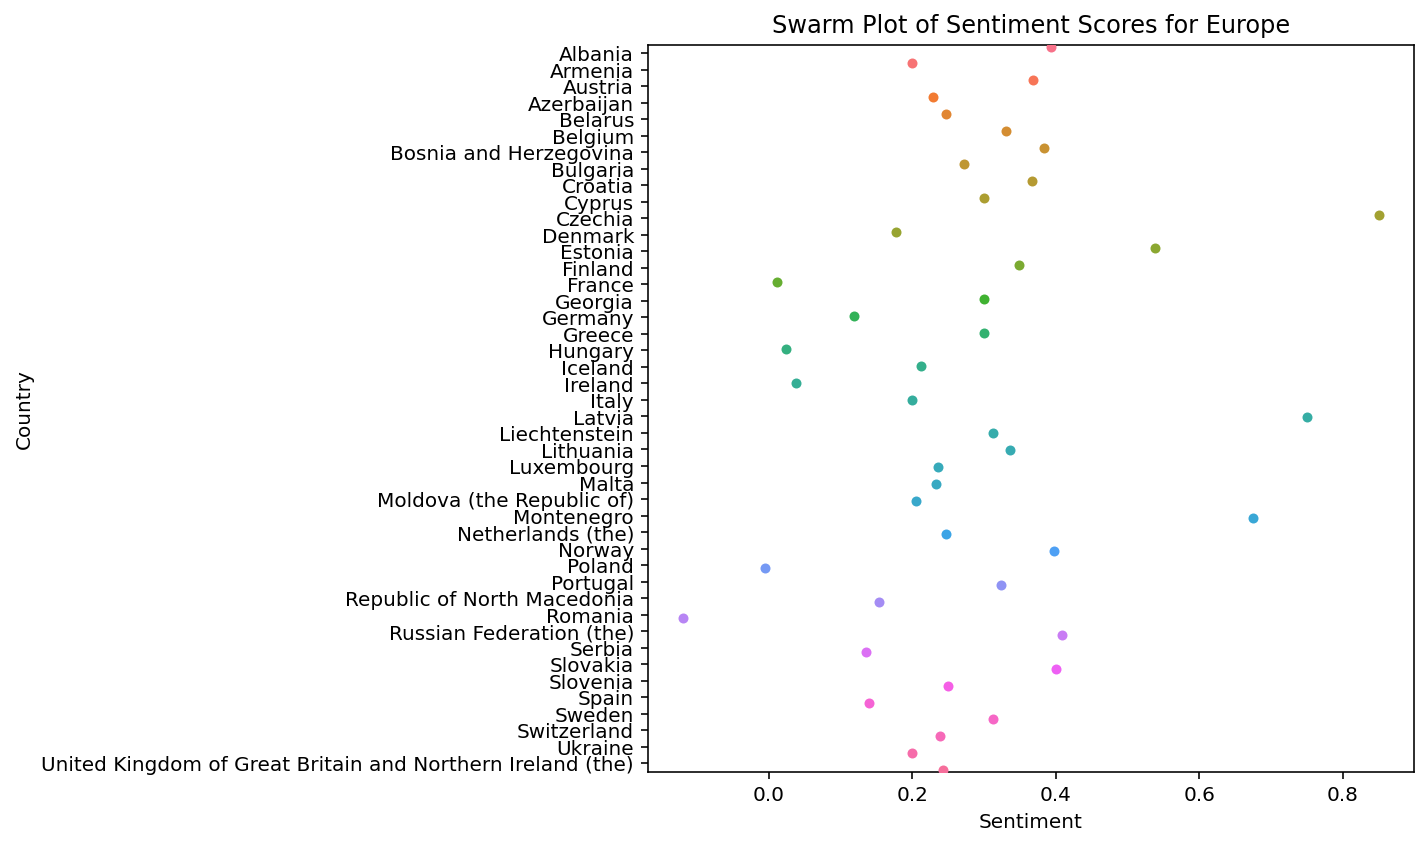

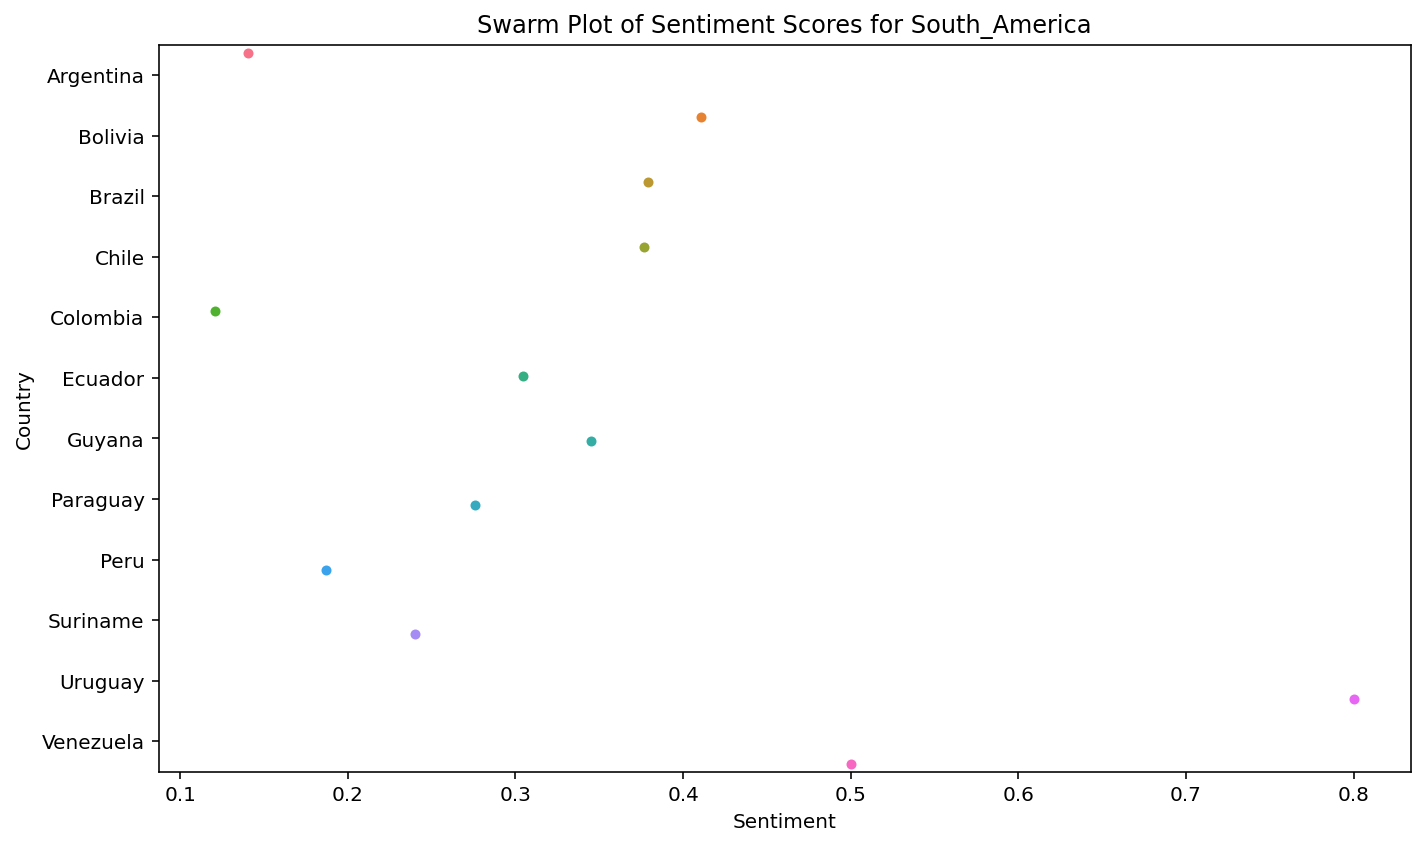

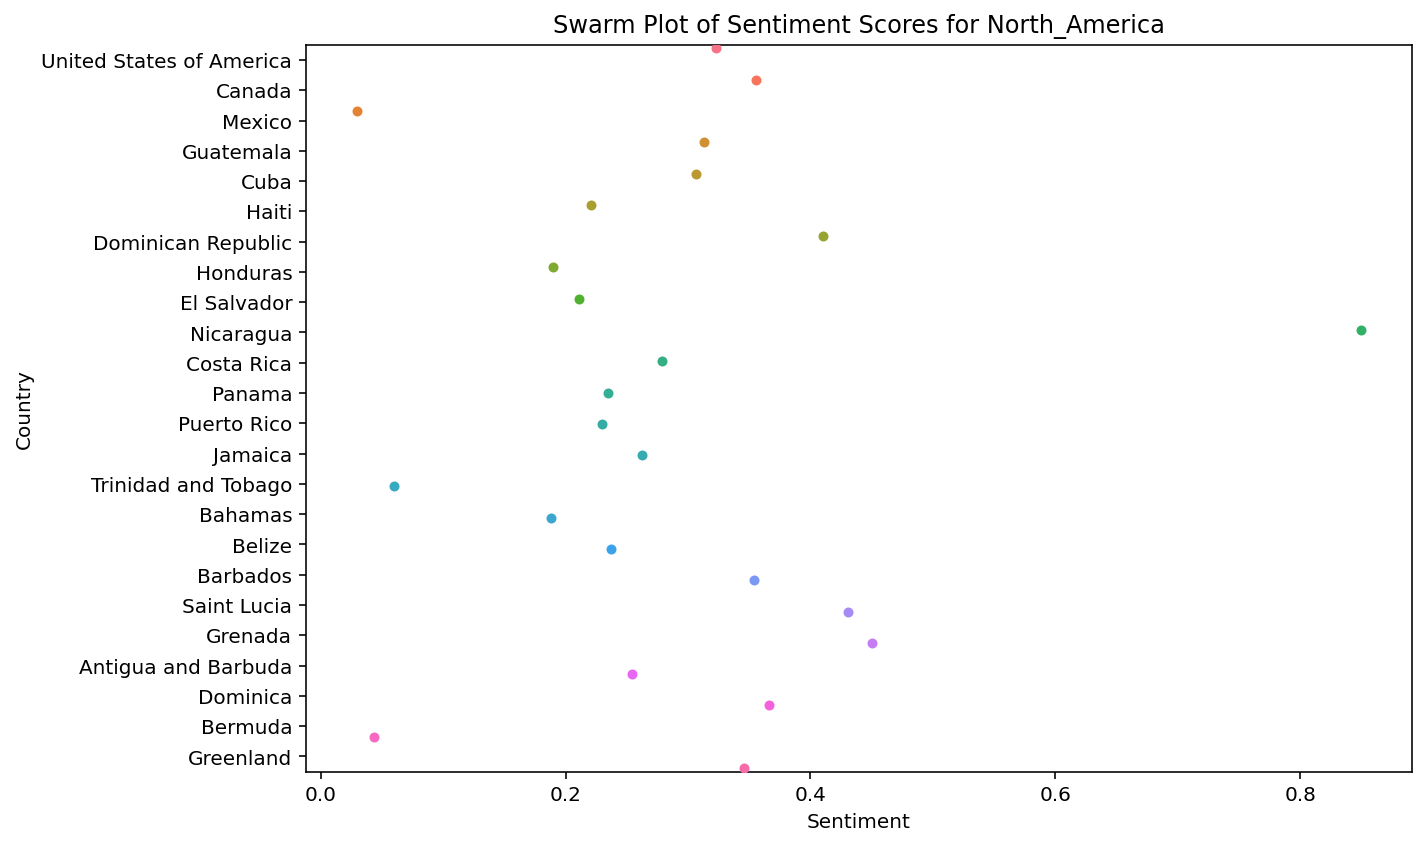

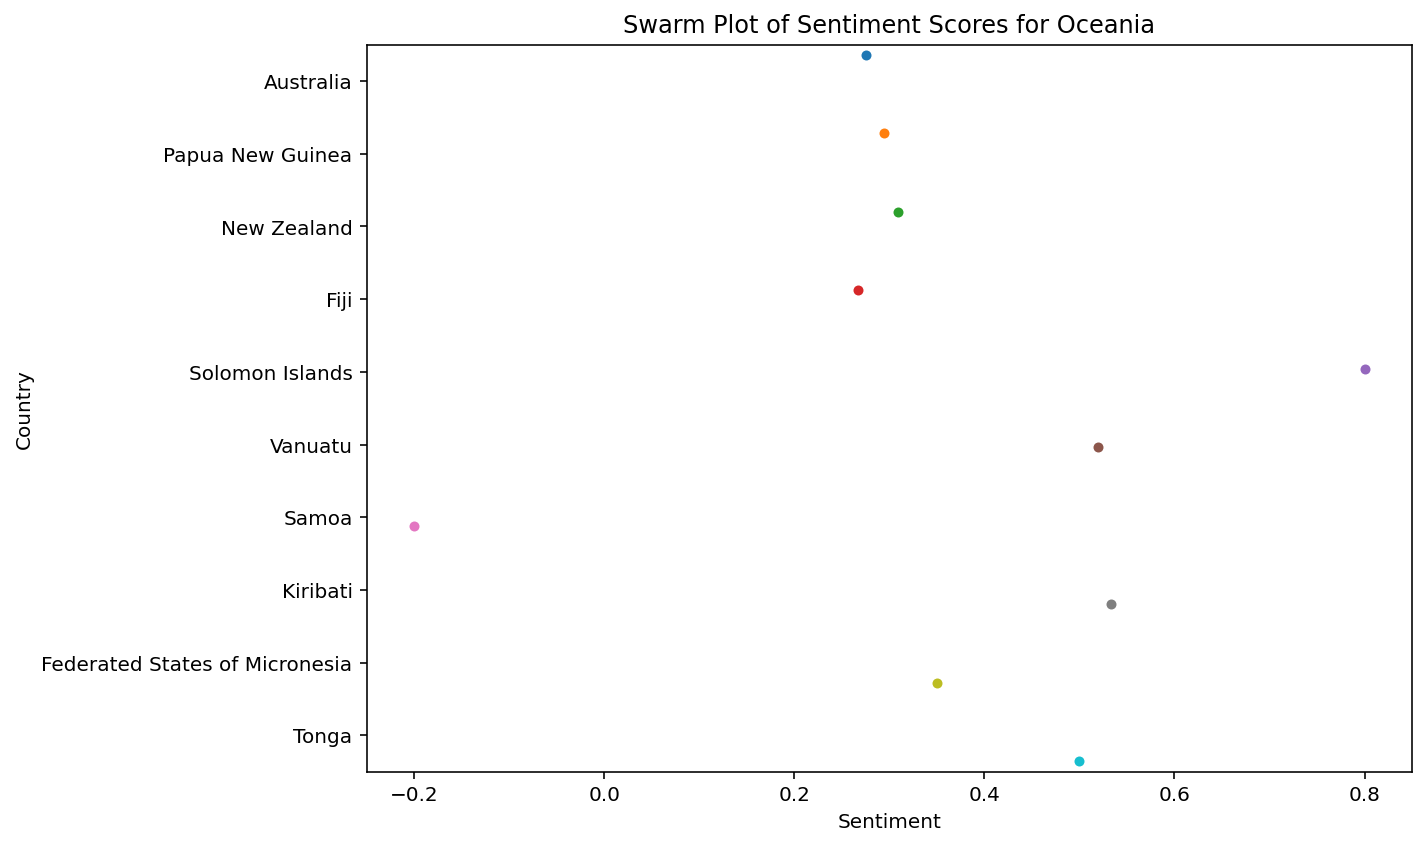

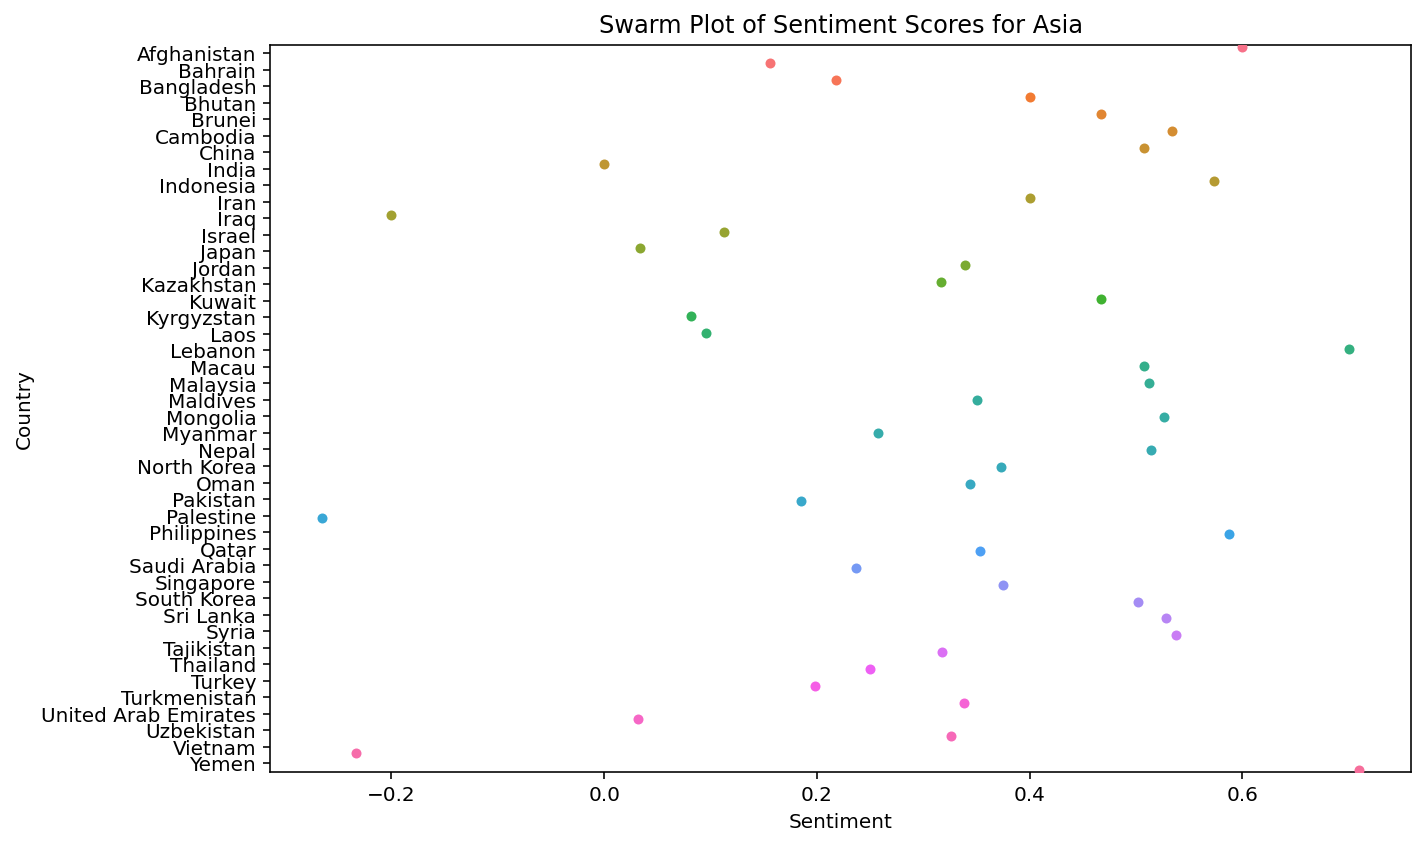

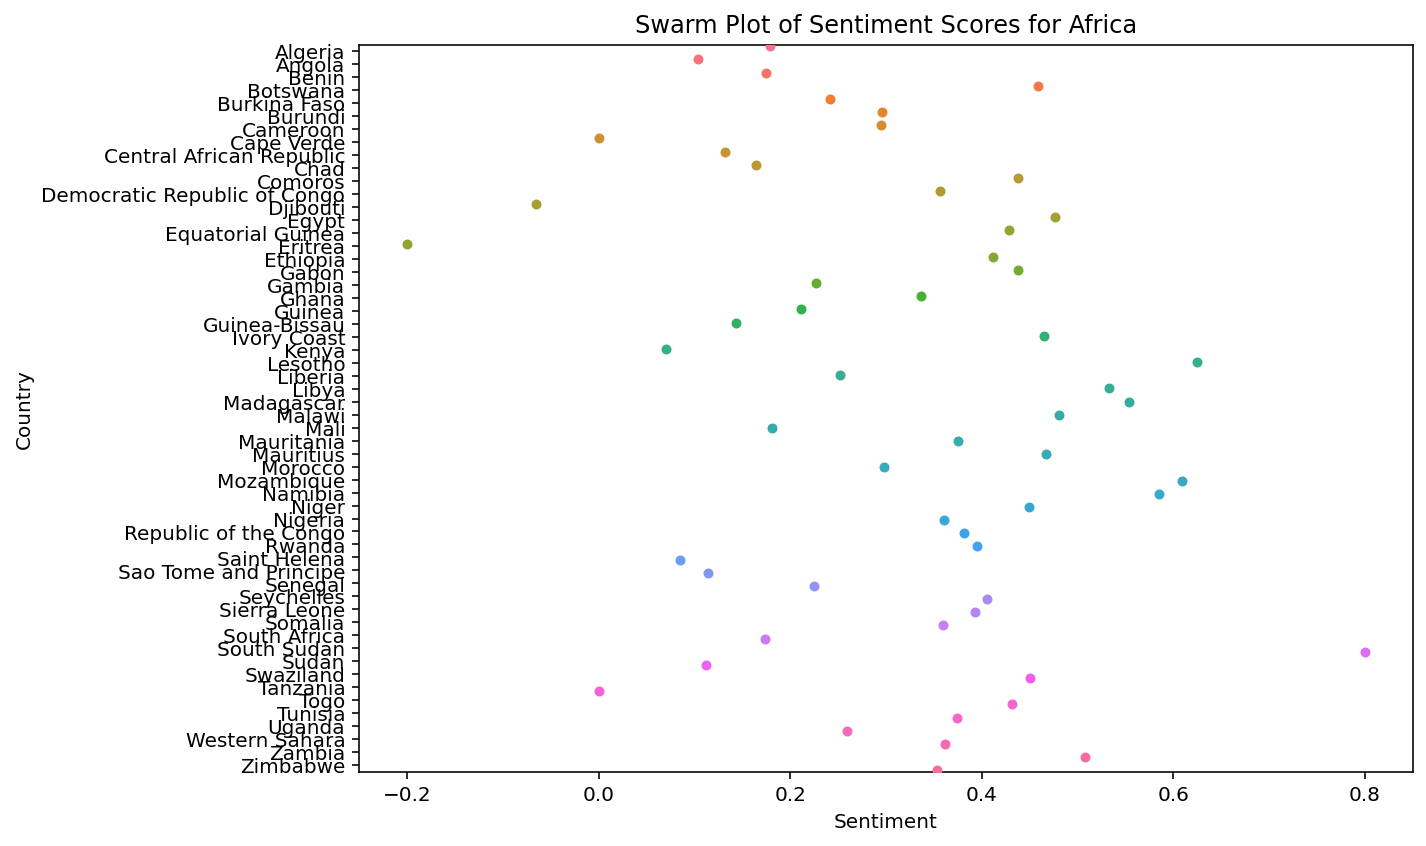

In [161]:
for continent in anthem['Continent'].unique():
    plt.figure(figsize=(10, 6))
    subset = anthem[anthem['Continent'] == continent]
    
    sns.swarmplot(data=subset, x='Sentiment', y='Country', hue='Country', dodge=True)
    
    plt.xlabel('Sentiment')
    plt.ylabel('Country')
    plt.title(f'Swarm Plot of Sentiment Scores for {continent}')
    plt.tight_layout()
    plt.show()

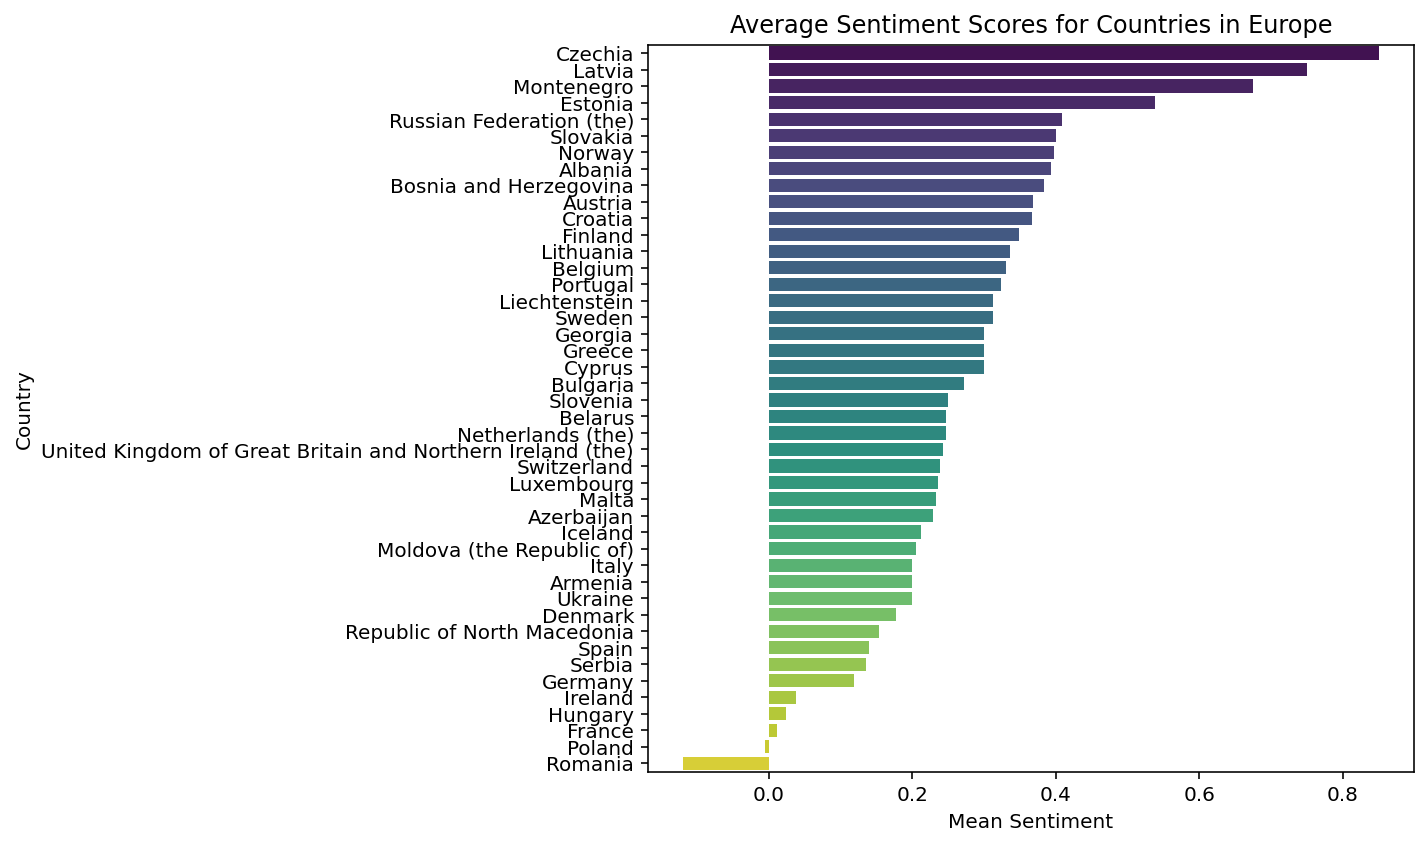

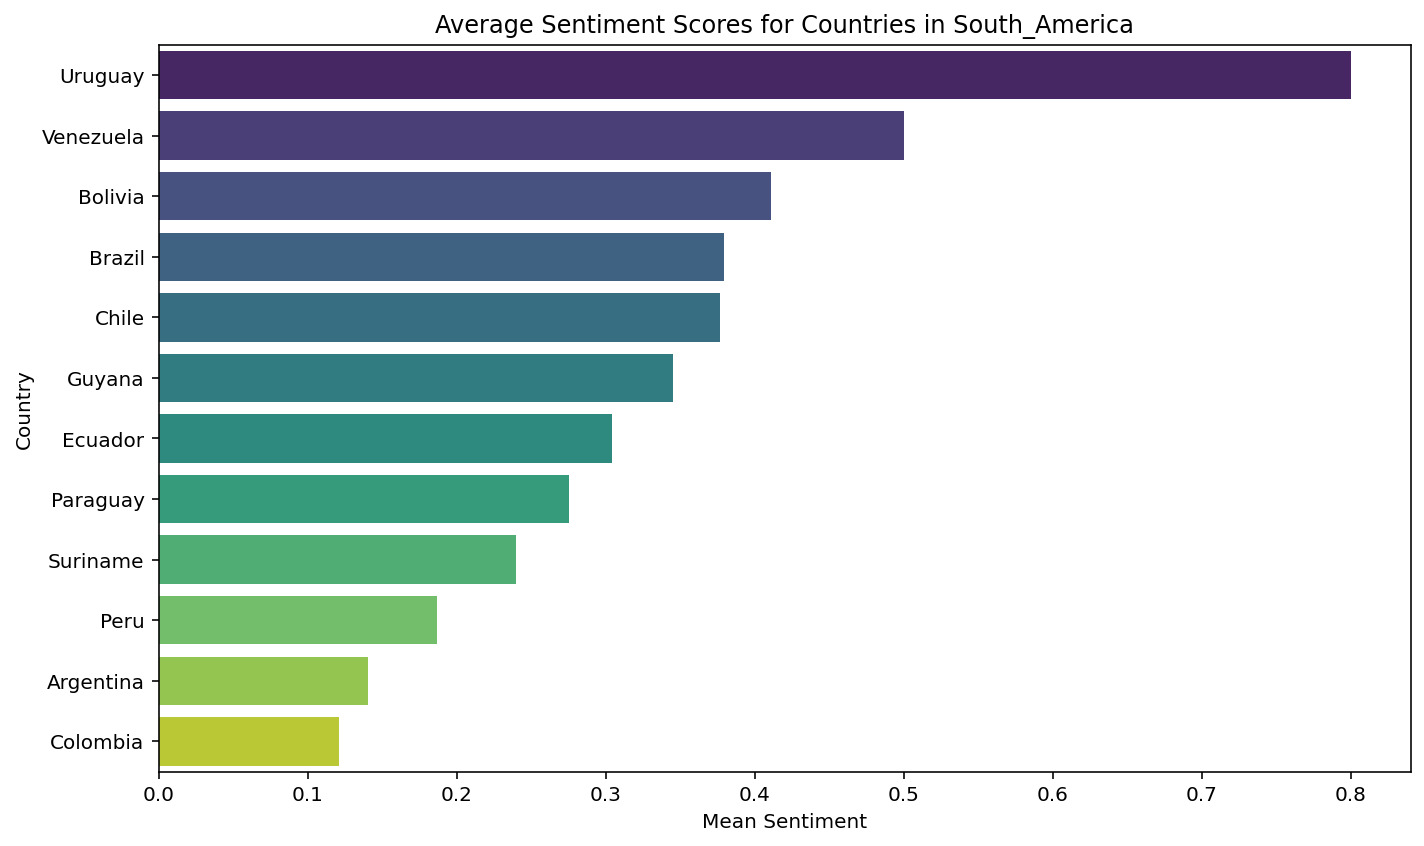

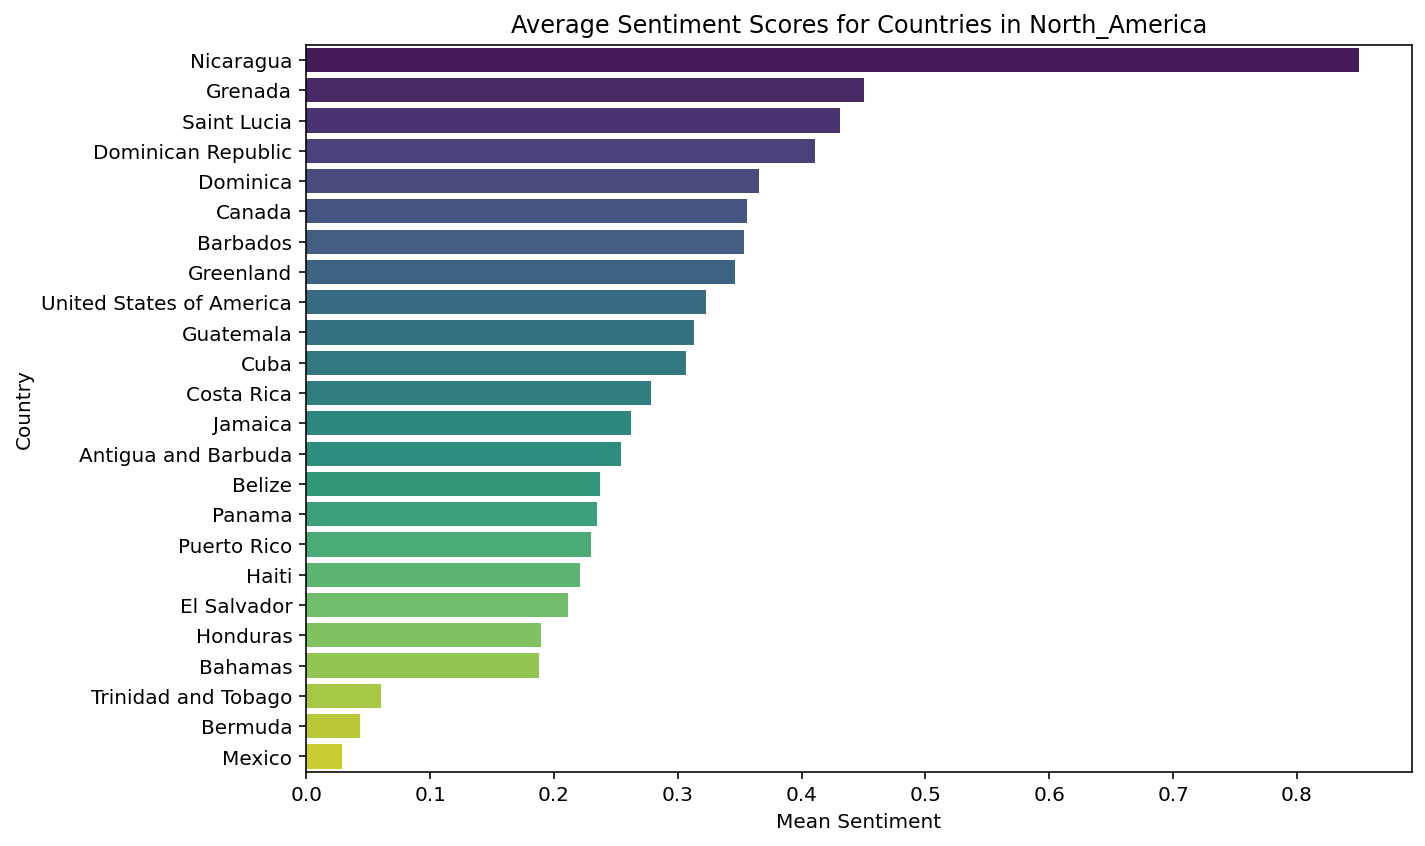

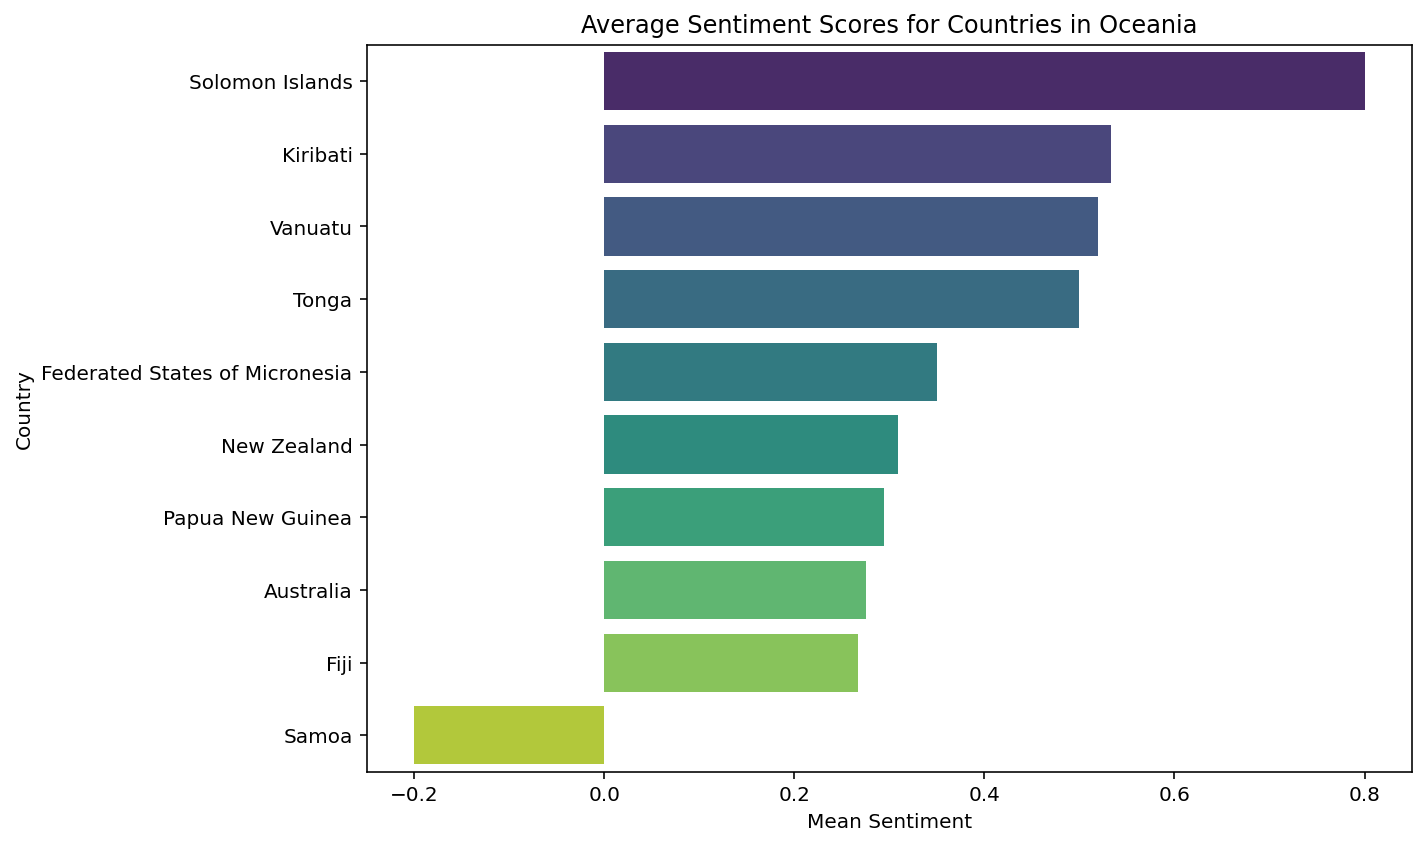

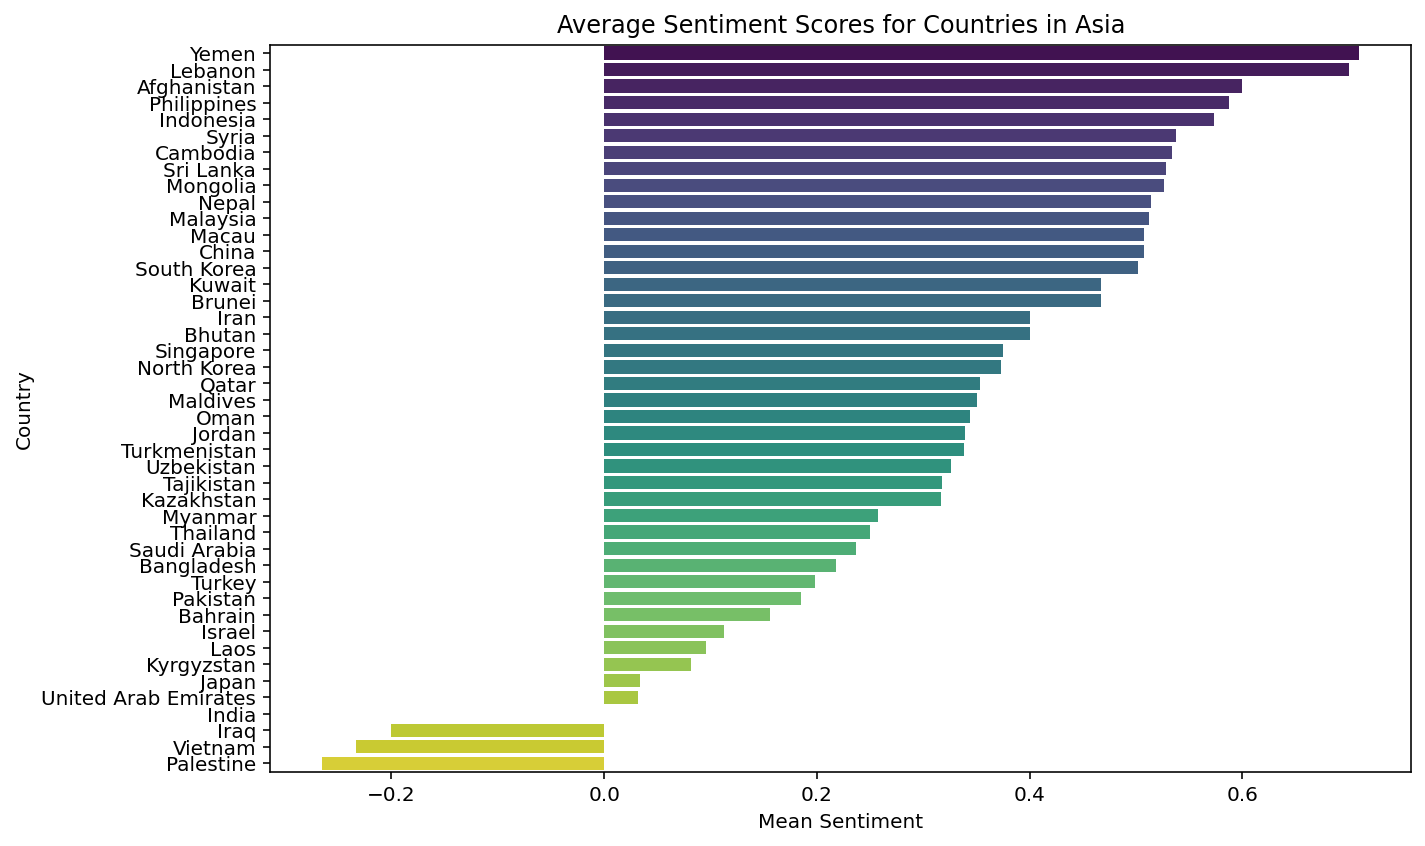

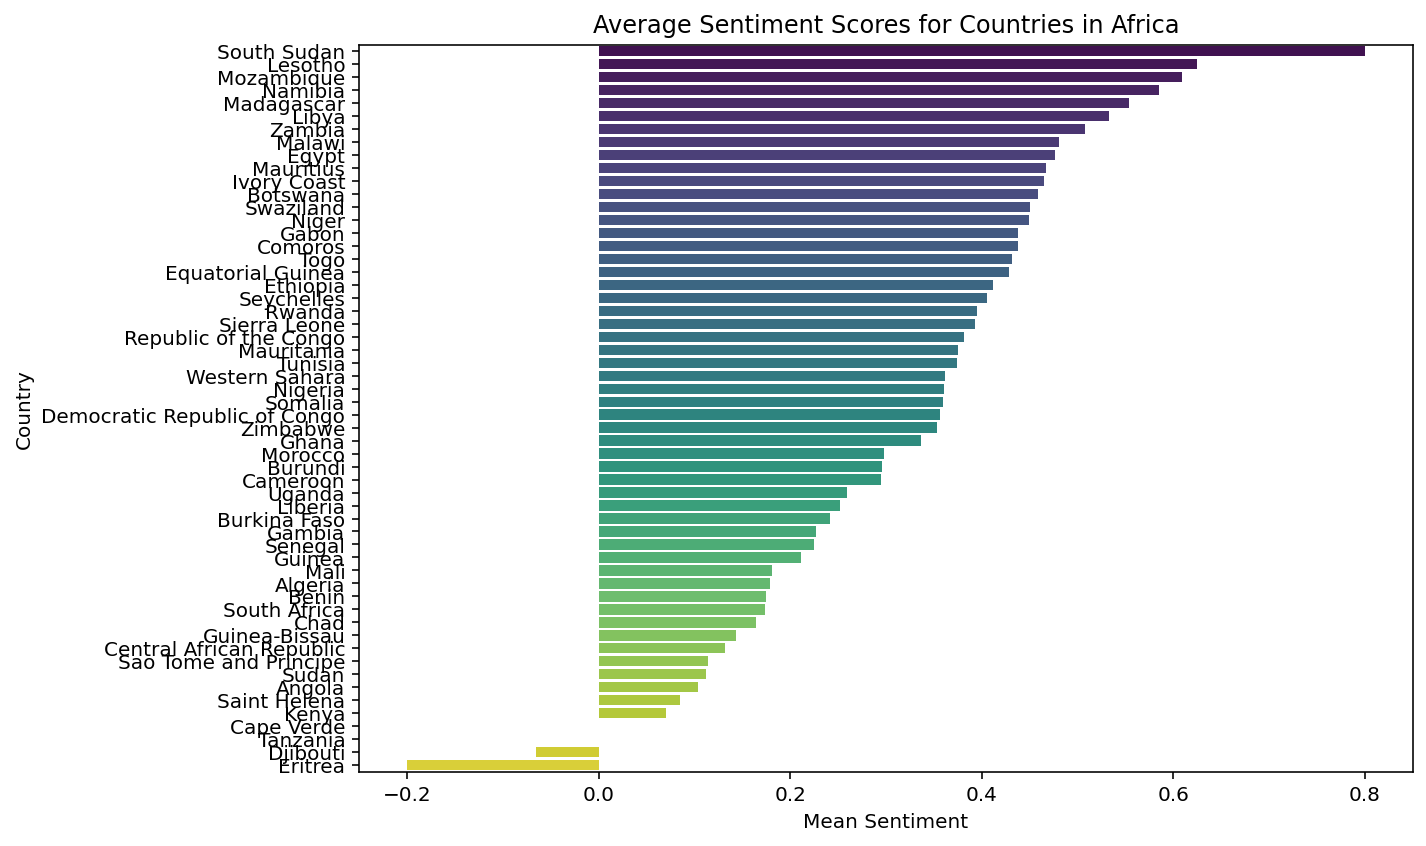

In [162]:
for continent in anthem['Continent'].unique():
    plt.figure(figsize=(10, 6))
    subset = anthem[anthem['Continent'] == continent]
    mean_sentiment = subset.groupby('Country')['Sentiment'].mean().reset_index()
    mean_sentiment = mean_sentiment.sort_values(by='Sentiment', ascending=False)
    
    sns.barplot(data=mean_sentiment, x='Sentiment', y='Country', hue='Country', palette='viridis', dodge=False, legend=False)
    plt.xlabel('Mean Sentiment')
    plt.ylabel('Country')
    plt.title(f'Average Sentiment Scores for Countries in {continent}')
    plt.tight_layout()
    plt.show()

In [166]:
country1_data = anthem[anthem['Country'] == 'Slovakia']['Cleaned_Anthem']
country2_data = anthem[anthem['Country'] == 'Romania']['Cleaned_Anthem']
country3_data = anthem[anthem['Country'] == 'Czechia']['Cleaned_Anthem']
country4_data = anthem[anthem['Country'] == 'Uruguay']['Cleaned_Anthem']
country5_data = anthem[anthem['Country'] == 'Colombia']['Cleaned_Anthem']
country6_data = anthem[anthem['Country'] == 'Nicaragua']['Cleaned_Anthem']
country7_data = anthem[anthem['Country'] == 'Mexico']['Cleaned_Anthem']


X_country1 = vectorizer.fit_transform(country1_data)
X_country2 = vectorizer.fit_transform(country2_data)
X_country3 = vectorizer.fit_transform(country3_data)
X_country4 = vectorizer.fit_transform(country4_data)
X_country5 = vectorizer.fit_transform(country5_data)
X_country6 = vectorizer.fit_transform(country6_data)
X_country7 = vectorizer.fit_transform(country7_data)



feature_names = vectorizer.get_feature_names_out()

tfidf_country1 = X_country1.sum(axis=0)
tfidf_country2 = X_country2.sum(axis=0)
tfidf_country3 = X_country3.sum(axis=0)
tfidf_country4 = X_country4.sum(axis=0)
tfidf_country5 = X_country5.sum(axis=0)
tfidf_country6 = X_country6.sum(axis=0)
tfidf_country7 = X_country7.sum(axis=0)



top_10_country1 = sorted(zip(tfidf_country1.tolist()[0], feature_names), reverse=True)[:10]
top_10_country2 = sorted(zip(tfidf_country2.tolist()[0], feature_names), reverse=True)[:10]
top_10_country3 = sorted(zip(tfidf_country3.tolist()[0], feature_names), reverse=True)[:10]
top_10_country4 = sorted(zip(tfidf_country4.tolist()[0], feature_names), reverse=True)[:10]
top_10_country5 = sorted(zip(tfidf_country5.tolist()[0], feature_names), reverse=True)[:10]
top_10_country6 = sorted(zip(tfidf_country6.tolist()[0], feature_names), reverse=True)[:10]
top_10_country7 = sorted(zip(tfidf_country7.tolist()[0], feature_names), reverse=True)[:10]


print("Top 10 words for Slovakia:", [word for _, word in top_10_country1])
print("Top 10 words for Romania:", [word for _, word in top_10_country2])
print("Top 10 words for Czechia:", [word for _, word in top_10_country3])
print("Top 10 words for Uruguay:", [word for _, word in top_10_country4])
print("Top 10 words for Colombia:", [word for _, word in top_10_country5])
print("Top 10 words for Nicaragua:", [word for _, word in top_10_country6])
print("Top 10 words for Mexico:", [word for _, word in top_10_country7])


Top 20 words for Slovakia: ['cause', 'belligerent', 'child', 'cannon', 'bugle', 'bridle', 'breath', 'bravery', 'blood', 'blemish', 'beneath', 'beloved', 'battle', 'banner', 'attempt', 'archangel']
Top 20 words for Romania: ['hero', 'forehead', 'fatherland', 'divine', 'child', 'beloved', 'resound', 'profane', 'peace', 'patriotic', 'palace', 'olive', 'oh', 'nobly', 'neck', 'mount', 'mexican', 'memory', 'liberty', 'lend']
Top 20 words for Czechia: ['beloved', 'beneath', 'banner', 'child', 'cause', 'cannon', 'bugle', 'bridle', 'breath', 'bravery', 'blood', 'blemish', 'belligerent', 'battle', 'attempt', 'archangel']
Top 20 words for Uruguay: ['breath', 'core', 'fatherland', 'enemy', 'destiny', 'crash', 'countryside', 'cause', 'echo', 'earth', 'bugle', 'bravery', 'cannon', 'belligerent', 'exist', 'exhale', 'beloved', 'eternal', 'divine', 'crumble']
Top 20 words for Colombia: ['think', 'war', 'thunder', 'sway', 'resound', 'patriotic', 'foreign', 'core', 'bravery', 'banner', 'yoke', 'written',

In [174]:
top_words_df = pd.DataFrame({
    'Slovakia': [word for _, word in top_10_country1],
    'Romania': [word for _, word in top_10_country2],
    'Czechia': [word for _, word in top_10_country3],
    'Uruguay': [word for _, word in top_10_country4],
    'Colombia': [word for _, word in top_10_country5],
    'Nicaragua': [word for _, word in top_10_country6],
    'Mexico': [word for _, word in top_10_country7]
})

print(top_words_df)

NameError: name 'top_10_country1' is not defined